# Análise de Atendimentos ao cliente

### FEITO POR: Carolina Tavares Sancho Monteiro

### Análise
Você é responsável pelos indicadores do time de Relacionamento com o Cliente de uma empresa X e tem como objetivo analisar o indicador de Índice de Satisfação do nosso atendimento.

A nossa pesquisa de satisfação é enviada ao término de cada chamado que recebemos e o cliente pode responder a seguinte pergunta com notas de 1 à 5, sendo 5 muito positiva e 1 muito negativa: “Qual foi a sua experiência com o nosso atendimento?”

O nosso índice de satisfação é o percentual de respostas maior ou igual a 4 em relação ao total de respostas.

Você recebeu uma base com os nossos chamados do primeiro semestre de 2019 contendo dados do atendimento (data de abertura do chamado, canal de atendimento, assunto do chamado e a resposta da pesquisa). Além dessa base, você recebeu a base com os dados de todos os nossos clientes (data de credenciamento, município, ramo de atividade e TPV)

Dado:
TPV (Total Payment Volume): é o volume transacionado pelo cliente.

### Importando as libs e os arquivos da base:

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
dfclient = pd.read_csv('base_clientes.csv', sep=';')

In [3]:
dfcham = pd.read_csv('base_chamados.csv', sep=';')

In [4]:
import chardet
with open('municipios.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Arquivo csv de município/estado/região baixado da base do governo

In [5]:
dfestados = pd.read_csv('http://blog.mds.gov.br/redesuas/wp-content/uploads/2018/06/Lista_Munic%C3%ADpios_com_IBGE_Brasil_Versao_CSV.csv', encoding='ISO-8859-1', sep = ';')

In [6]:
dfcham['Data de abertura'] = pd.to_datetime(dfcham['Data de abertura'], format='%d/%m/%Y')

<AxesSubplot:>

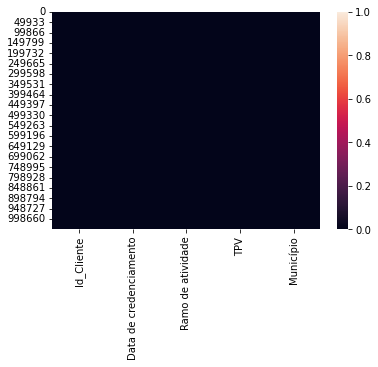

In [7]:
sns.heatmap(dfclient.isnull())

<AxesSubplot:>

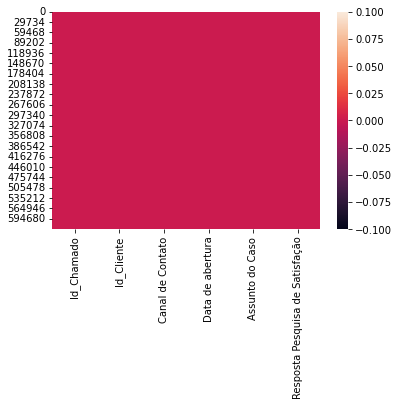

In [8]:
sns.heatmap(dfcham.isnull())

### Analisando a base de dados:

In [9]:
dfclient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   Id_Cliente              1048575 non-null  int64 
 1   Data de credenciamento  1048575 non-null  object
 2   Ramo de atividade       1048575 non-null  object
 3   TPV                     1048575 non-null  object
 4   Município               1048565 non-null  object
dtypes: int64(1), object(4)
memory usage: 40.0+ MB


In [10]:
dfcham.shape

(624405, 6)

In [11]:
dfclient.shape

(1048575, 5)

In [12]:
dfclient.columns

Index(['Id_Cliente', 'Data de credenciamento', 'Ramo de atividade', 'TPV',
       'Município'],
      dtype='object')

In [13]:
dfclient.columns = [x.strip().lower().replace(' ','_') for x in dfclient.columns]

In [14]:
dfcham.columns = [x.strip().lower().replace(' ','_') for x in dfcham.columns]

In [15]:
dfcham.columns

Index(['id_chamado', 'id_cliente', 'canal_de_contato', 'data_de_abertura',
       'assunto_do_caso', 'resposta_pesquisa_de_satisfação'],
      dtype='object')

In [16]:
dfcham.resposta_pesquisa_de_satisfação.value_counts()

Sem resposta    259298
5               149797
4                78382
3                67254
2                35681
1                33993
Name: resposta_pesquisa_de_satisfação, dtype: int64

In [17]:
dfclient.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [18]:
dfclient.duplicated().sum()

0

In [19]:
dfclient.isnull().sum()

id_cliente                 0
data_de_credenciamento     0
ramo_de_atividade          0
tpv                        0
município                 10
dtype: int64

### Taxa de Resposta - 58,5%

In [20]:
dfcham['resp'] = 1
dfcham.resp= dfcham.resposta_pesquisa_de_satisfação.apply(lambda x: '0' if x=='Sem resposta' else '1')

In [21]:
dfsr = dfcham[dfcham['resp'] == '0'].reset_index()

In [22]:
dfcham['resp'].value_counts()


1    365107
0    259298
Name: resp, dtype: int64

In [23]:
dfcham[['resp']].value_counts(normalize=True)

resp
1       0.584728
0       0.415272
dtype: float64

In [24]:
df9 = dfcham.groupby(['resp'])[['resp']].count()
df9['perc']=df9['resp']*100/df9['resp'].sum()
df9

,resp,perc
resp,,
0,259298,41.527214
1,365107,58.472786


In [121]:
df9.to_csv('percrespostas.csv',sep=';',index=False)

### Índice de Satisfação semestral (1/2019) - 62,5%

Criando um novo dataframe dropando as linhas com resposta de satisfação = Sem resposta para cálculo do índice de satisfação apenas com os clientes que responderam a pesquisa

In [25]:
rows2drop = dfcham.index[(dfcham['resposta_pesquisa_de_satisfação']=='Sem resposta')]

In [26]:
rows2drop.nunique()

259298

In [27]:
dfchamados = dfcham.drop(rows2drop,axis=0)

In [28]:
dfchamados.resposta_pesquisa_de_satisfação.describe()

count     365107
unique         5
top            5
freq      149797
Name: resposta_pesquisa_de_satisfação, dtype: object

Alterando o datatype de object para int:

In [29]:
dfchamados['resposta_pesquisa_de_satisfação'] = dfchamados['resposta_pesquisa_de_satisfação'].astype(int)

In [30]:
dfchamados.resposta_pesquisa_de_satisfação.value_counts(normalize=True)

5    0.410282
4    0.214682
3    0.184204
2    0.097728
1    0.093104
Name: resposta_pesquisa_de_satisfação, dtype: float64

In [31]:
dfchamados.resposta_pesquisa_de_satisfação.describe()

count    365107.000000
mean          3.751311
std           1.327212
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: resposta_pesquisa_de_satisfação, dtype: float64

In [32]:
dfpesquisa = dfchamados.groupby(['resposta_pesquisa_de_satisfação'])[['resposta_pesquisa_de_satisfação']].count()
dfpesquisa['%']=round((dfpesquisa.resposta_pesquisa_de_satisfação/dfpesquisa.resposta_pesquisa_de_satisfação.sum())*100,2)
dfpesquisa

,resposta_pesquisa_de_satisfação,%
resposta_pesquisa_de_satisfação,,
1,33993,9.31
2,35681,9.77
3,67254,18.42
4,78382,21.47
5,149797,41.03


In [140]:
dfpesquisa.resposta_pesquisa_de_satisfação.value_counts()

33993     1
35681     1
67254     1
78382     1
149797    1
Name: resposta_pesquisa_de_satisfação, dtype: int64

In [122]:
dfpesquisa.to_csv('pesquisanotas.csv',sep=';',index=False)

### 41% de notas 5
### 21% de notas 4

In [33]:
dfchamados['indice_satisfacao'] = 0
dfchamados['indice_satisfacao'] = dfchamados.resposta_pesquisa_de_satisfação.apply(lambda x: x if x>=4 else 0)


In [34]:
dfchamados.indice_satisfacao.value_counts(normalize=True)

5    0.410282
0    0.375035
4    0.214682
Name: indice_satisfacao, dtype: float64

### 1. Construa uma visualização que mostre a evolução do Índice de Satisfação no ano de 2019

In [35]:
dfchamados['indice'] = 0
dfchamados.indice= dfchamados.resposta_pesquisa_de_satisfação.apply(lambda x: '1' if x>=4 else '0')

In [36]:
dfchamados.indice.value_counts(normalize=True)

1    0.624965
0    0.375035
Name: indice, dtype: float64

In [37]:
dfpesquisa2 = dfchamados.groupby(['indice'])[['indice']].count()
dfpesquisa2['%']=round((dfpesquisa2.indice/dfpesquisa2.indice.sum())*100,2)
dfpesquisa2

,indice,%
indice,,
0,136928,37.5
1,228179,62.5


In [38]:
dfchamados['data_de_abertura']=pd.to_datetime(dfchamados['data_de_abertura'],  format='%d/%m/%Y')
dfchamados.data_de_abertura.unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-11T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28

In [39]:
dfmonth= dfchamados.groupby(pd.Grouper(key='data_de_abertura', axis=0, freq='M')).count()

In [40]:
dfmonth= dfchamados.groupby(pd.Grouper(key='data_de_abertura', axis=0, freq='M')).count()
dfchamados['month'] = pd.DatetimeIndex(dfchamados['data_de_abertura']).month


Criando o dataframe que possui a coluna mês e possui TODOS os id chamados, inclusive os sem resposta!

In [41]:
dfcham['data_de_abertura']=pd.to_datetime(dfcham['data_de_abertura'], format='%d/%m/%Y')


In [42]:
dfmonth2= dfcham.groupby(pd.Grouper(key='data_de_abertura', axis=0, freq='M')).count()

In [43]:
dfmonth= dfcham.groupby(pd.Grouper(key='data_de_abertura', axis=0, freq='M')).count()
dfcham['month'] = pd.DatetimeIndex(dfcham['data_de_abertura']).month


In [44]:
df2 = dfchamados.groupby(['month'])[['id_chamado']].count()


In [45]:
df1 = dfchamados.groupby(['month','indice']).agg(Total_Respostas=('indice','count')).reset_index()


In [46]:
df3 = pd.merge(df1,df2,on='month')
df3

,month,indice,Total_Respostas,id_chamado
0,1,0,22412,59792
1,1,1,37380,59792
2,2,0,23594,60414
3,2,1,36820,60414
4,3,0,23755,62757
5,3,1,39002,62757
6,4,0,19658,51857
7,4,1,32199,51857
8,5,0,20985,57453
9,5,1,36468,57453


In [47]:
df3['perc']=round((df3.Total_Respostas/df3.id_chamado)*100,2)
df4 = df3[df3['indice']=='1'].reset_index()
#filtro de índice=1 indica apenas as pessoas que responderam a pesquisa E avaliaram com nota>=4
df4['Total_Respostas'].sum()
#vai de 624.405(total de pessoas que atenderam o chamado - máximo 98340 no mês 6) 365.107 (total de pessoas que responderam a pesquisa - máximo 56687 no mês 6) para 228.179(total de pessoas que responderam com >=4 -máximo 36322 no mês 6)


228179

In [48]:
df4.Total_Respostas.sum()

228179

In [49]:
df4
#df4 é o dataframe com o total de respostas >=4

,index,month,indice,Total_Respostas,id_chamado,perc
0,1,1,1,37380,59792,62.52
1,3,2,1,36820,60414,60.95
2,5,3,1,39002,62757,62.15
3,7,4,1,32199,51857,62.09
4,9,5,1,36468,57453,63.47
5,11,6,1,46310,72834,63.58


In [50]:
df4.to_csv('evolucao_indice.csv',sep=',',index=False)

<AxesSubplot:xlabel='month', ylabel='perc'>

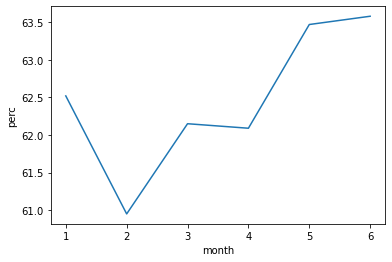

In [51]:
sns.lineplot(data=df4,x='month',y='perc', markers=True)

<AxesSubplot:xlabel='month', ylabel='Total_Respostas'>

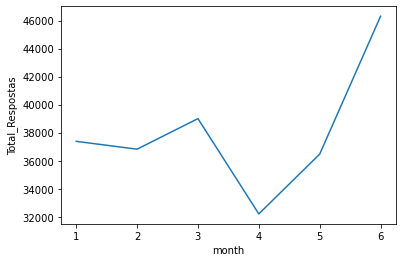

In [52]:
sns.lineplot(data=df4,x='month',y='Total_Respostas', markers=True)

In [53]:
dfcham.shape

(624405, 8)

In [54]:
df7 = dfcham.groupby(['month'])[['id_chamado']].count()
df7
#df7 é o dataframe TOTAL, com e sem respostas na avaliação

,id_chamado
month,
1,99588
2,99343
3,104371
4,90741
5,101782
6,128580


In [55]:
df7.to_csv('evolucao_totalchamados.csv',sep=';',index=False)

<AxesSubplot:xlabel='month', ylabel='id_chamado'>

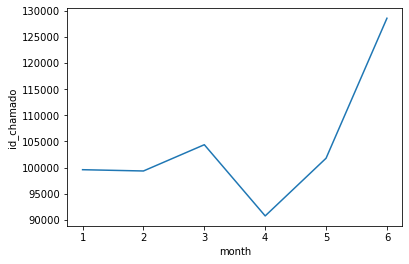

In [56]:
sns.lineplot(data=df7,x='month',y='id_chamado', markers=True)

In [57]:
df8 = dfchamados.groupby(['month'])[['id_chamado']].count()
df8
#df8 é o dataframe com o total de pessoas que responderam a pesquisa, com notas >=4 e notas<4

,id_chamado
month,
1,59792
2,60414
3,62757
4,51857
5,57453
6,72834


In [58]:
df8.to_csv('evolucao_totalrespostasss.csv',sep=';',index=False)

In [59]:
df8.id_chamado.sum()

365107

<AxesSubplot:xlabel='month', ylabel='id_chamado'>

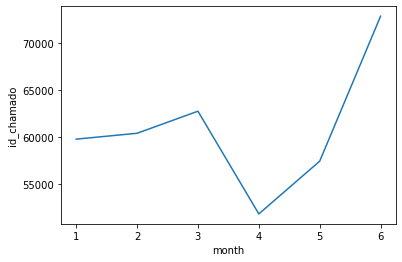

In [60]:
sns.lineplot(data=df8,x='month',y='id_chamado', markers=True)

### 2. Identifique os principais ofensores do resultado do Índice de Satisfação.

# Canal de Contato

In [147]:
dfchamados

,id_chamado,id_cliente,canal_de_contato,data_de_abertura,assunto_do_caso,resposta_pesquisa_de_satisfação,resp,indice_satisfacao,indice,month
1,2,255126,Email,2019-01-01,Solicitação de manutenção da máquina,5,1,5,1,1
3,4,642579,Chat,2019-01-01,Dúvidas/Acesso ao Portal,5,1,5,1,1
7,8,554627,Chat,2019-01-01,Dúvidas/Acesso ao Portal,3,1,0,0,1
10,11,389975,Telefone,2019-01-01,Consulta das Tarifas Aplicadas,4,1,4,1,1
13,14,1028117,Telefone,2019-01-01,Alteração de dados cadastrais,5,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...
624399,624400,13723,Telefone,2019-06-30,Solicitação de manutenção da máquina,5,1,5,1,6
624400,624401,1041226,Telefone,2019-06-30,Consulta das Tarifas Aplicadas,4,1,4,1,6
624402,624403,616019,Whatsapp,2019-06-30,Alteração de dados cadastrais,4,1,4,1,6
624403,624404,821775,Chat,2019-06-30,Dúvidas/Acesso ao Portal,4,1,4,1,6


In [146]:
dfchamados
dfpesquisa20 = dfchamados.groupby(['canal_de_contato','indice'])[['indice']].count()
dfpesquisa20['%']=round((dfpesquisa20.indice/dfpesquisa20.indice.sum())*100,2)
dfpesquisa20

indice      %
canal_de_contato indice               
Chat             0        36907  10.11
                 1        62778  17.19
Email            0         4655   1.27
                 1         7808   2.14
Telefone         0        75501  20.68
                 1       130940  35.86
Whatsapp         0        19865   5.44
                 1        26653   7.30

In [61]:
dfchamados.canal_de_contato.value_counts()

Telefone    206441
Chat         99685
Whatsapp     46518
Email        12463
Name: canal_de_contato, dtype: int64

In [62]:
dfcham.groupby(['resposta_pesquisa_de_satisfação','canal_de_contato'])[['id_chamado']].count()

id_chamado
resposta_pesquisa_de_satisfação canal_de_contato            
1                               Chat                    9224
                                Email                   1195
                                Telefone               18741
                                Whatsapp                4833
2                               Chat                    9527
                                Email                   1196
                                Telefone               19454
                                Whatsapp                5504
3                               Chat                   18156
                                Email                   2264
                                Telefone               37306
                                Whatsapp                9528
4                               Chat                   21551
                                Email                   2620
                                Telefone               44953
                                Whatsapp                9258
5                               Chat                   41227
                                Email                   5188
                                Telefone               85987
                                Whatsapp               17395
Sem resposta                    Chat                   71353
                                Email                   8826
                                Telefone              146209
                                Whatsapp               32910

In [63]:
dfpesq20 = dfcham[dfcham['canal_de_contato']== 'Telefone']
dfpesq20 = dfpesq20.groupby(['canal_de_contato','resposta_pesquisa_de_satisfação'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq20['%']=round((dfpesq20.id_chamado/dfpesq20.id_chamado.sum())*100,2)
dfpesq20

id_chamado      %
canal_de_contato resposta_pesquisa_de_satisfação                   
Telefone         Sem resposta                         146209  41.46
                 5                                     85987  24.38
                 4                                     44953  12.75
                 3                                     37306  10.58
                 2                                     19454   5.52
                 1                                     18741   5.31

In [64]:
dfpesq21 = dfcham[dfcham['canal_de_contato']== 'Telefone']
dfpesq21 = dfpesq21.groupby(['canal_de_contato','assunto_do_caso'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq21['%']=round((dfpesq21.id_chamado/dfpesq21.id_chamado.sum())*100,2)
dfpesq21

id_chamado      %
canal_de_contato assunto_do_caso                                        
Telefone         Alteração de dados cadastrais             106300  30.14
                 Solicitação de manutenção da máquina      105312  29.86
                 Consulta das Tarifas Aplicadas             64774  18.37
                 Dúvidas/Acesso ao Portal                   54923  15.57
                 Habilitação de Bandeiras                   21341   6.05

In [65]:
dfpesq = dfcham[dfcham['resposta_pesquisa_de_satisfação']== 'Sem resposta']
dfpesq = dfpesq.groupby(['resposta_pesquisa_de_satisfação','canal_de_contato'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq['%']=round((dfpesq.id_chamado/dfpesq.id_chamado.sum())*100,2)
dfpesq

id_chamado      %
resposta_pesquisa_de_satisfação canal_de_contato                   
Sem resposta                    Telefone              146209  56.39
                                Chat                   71353  27.52
                                Whatsapp               32910  12.69
                                Email                   8826   3.40

In [66]:
dfpesq1 = dfcham[dfcham['resposta_pesquisa_de_satisfação']== '1']
dfpesq1 = dfpesq1.groupby(['resposta_pesquisa_de_satisfação','canal_de_contato'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq1['%']=round((dfpesq1.id_chamado/dfpesq1.id_chamado.sum())*100,2)
dfpesq1

id_chamado      %
resposta_pesquisa_de_satisfação canal_de_contato                   
1                               Telefone               18741  55.13
                                Chat                    9224  27.13
                                Whatsapp                4833  14.22
                                Email                   1195   3.52

In [67]:
dfpesq2 = dfcham[dfcham['resposta_pesquisa_de_satisfação']== '2']
dfpesq2 = dfpesq2.groupby(['resposta_pesquisa_de_satisfação','canal_de_contato'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq2['%']=round((dfpesq2.id_chamado/dfpesq2.id_chamado.sum())*100,2)
dfpesq2

id_chamado      %
resposta_pesquisa_de_satisfação canal_de_contato                   
2                               Telefone               19454  54.52
                                Chat                    9527  26.70
                                Whatsapp                5504  15.43
                                Email                   1196   3.35

In [68]:
dfpesq3 = dfcham[dfcham['resposta_pesquisa_de_satisfação']== '3']
dfpesq3 = dfpesq3.groupby(['resposta_pesquisa_de_satisfação','canal_de_contato'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq3['%']=round((dfpesq3.id_chamado/dfpesq3.id_chamado.sum())*100,2)
dfpesq3

id_chamado      %
resposta_pesquisa_de_satisfação canal_de_contato                   
3                               Telefone               37306  55.47
                                Chat                   18156  27.00
                                Whatsapp                9528  14.17
                                Email                   2264   3.37

In [69]:
dfpesq45 = dfcham[(dfcham['resposta_pesquisa_de_satisfação']== '4') | (dfcham['resposta_pesquisa_de_satisfação']== '5')].reset_index()
dfpesq45 = dfpesq45.groupby(['canal_de_contato'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq45['%']=round((dfpesq45.id_chamado/dfpesq45.id_chamado.sum())*100,2)
dfpesq45

#todas as pessoas que fizeram chamado as que tiveram notas 4 e 5

,id_chamado,%
canal_de_contato,,
Telefone,130940,57.38
Chat,62778,27.51
Whatsapp,26653,11.68
Email,7808,3.42


In [70]:
dfpesquisa10 = dfcham.groupby(['canal_de_contato']).agg(Total_Chamados=('canal_de_contato','count')).sort_values(by='Total_Chamados',ascending=False)
dfpesquisa10['%']=round((dfpesquisa10.Total_Chamados/dfpesquisa10.Total_Chamados.sum())*100,2)
dfpesquisa10
## o df pesquisa 10 são com e sem respostas (maior)

,Total_Chamados,%
canal_de_contato,,
Telefone,352650,56.48
Chat,171038,27.39
Whatsapp,79428,12.72
Email,21289,3.41


In [71]:
dfpesquisa11 = dfchamados[dfchamados['indice']=='1'].reset_index()
dfpesquisa11 = dfpesquisa11.groupby(['canal_de_contato']).agg(Total_Chamados=('canal_de_contato','count')).sort_values(by='Total_Chamados',ascending=False)
#filtro de índice=1 indica apenas as pessoas que responderam a pesquisa E avaliaram com nota>=4
dfpesquisa11['%']=round((dfpesquisa11.Total_Chamados/dfpesquisa11.Total_Chamados.sum())*100,2)
dfpesquisa11

,Total_Chamados,%
canal_de_contato,,
Telefone,130940,57.38
Chat,62778,27.51
Whatsapp,26653,11.68
Email,7808,3.42


In [72]:
dfpesquisa5 = dfchamados.groupby(['canal_de_contato']).agg(Resposta_Média=('resposta_pesquisa_de_satisfação','mean'),Total_Chamados=('canal_de_contato','count')).sort_values(by='Total_Chamados',ascending=False)
dfpesquisa5['%']=round((dfpesquisa5.Total_Chamados/dfpesquisa5.Total_Chamados.sum())*100,2)
dfpesquisa5

,Resposta_Média,Total_Chamados,%
canal_de_contato,,,
Telefone,3.774996,206441,56.54
Chat,3.762703,99685,27.30
Whatsapp,3.620792,46518,12.74
Email,3.755035,12463,3.41


In [73]:
dfpesq123 = dfchamados[(dfchamados['resposta_pesquisa_de_satisfação']== 1) | (dfchamados['resposta_pesquisa_de_satisfação']== 2) | (dfchamados['resposta_pesquisa_de_satisfação']== 3)]

In [74]:
dfpesq123gr = dfpesq123.groupby(['canal_de_contato']).agg(Total_Notas_123=('canal_de_contato','count')).sort_values(by='Total_Notas_123',ascending=False)
dfpesq123gr['%_Notas_123']=round((dfpesq123gr.Total_Notas_123/dfpesq123gr.Total_Notas_123.sum())*100,2)
dfpesq123gr

,Total_Notas_123,%_Notas_123
canal_de_contato,,
Telefone,75501,55.14
Chat,36907,26.95
Whatsapp,19865,14.51
Email,4655,3.40


In [123]:
dfpesq123gr.to_csv('dfpesq123cc.csv',sep=';',index=False)

In [75]:
dfpesqtel = dfpesq123[(dfpesq123['canal_de_contato']== 'Telefone')].reset_index()
dfpesqtel= dfpesqtel.groupby(['canal_de_contato', 'assunto_do_caso']).agg(Total_123_Tel=('canal_de_contato','count')).sort_values(by='Total_123_Tel',ascending=False)
dfpesqtel['%_Total_123_Tel']=round((dfpesqtel.Total_123_Tel/dfpesqtel.Total_123_Tel.sum())*100,2)
dfpesqtel

Total_123_Tel  \
canal_de_contato assunto_do_caso                                       
Telefone         Alteração de dados cadastrais                 21877   
                 Solicitação de manutenção da máquina          21577   
                 Consulta das Tarifas Aplicadas                18263   
                 Dúvidas/Acesso ao Portal                       9773   
                 Habilitação de Bandeiras                       4011   

                                                       %_Total_123_Tel  
canal_de_contato assunto_do_caso                                        
Telefone         Alteração de dados cadastrais                   28.98  
                 Solicitação de manutenção da máquina            28.58  
                 Consulta das Tarifas Aplicadas                  24.19  
                 Dúvidas/Acesso ao Portal                        12.94  
                 Habilitação de Bandeiras                         5.31

In [76]:
dfpesqchat = dfpesq123[(dfpesq123['canal_de_contato']== 'Chat')].reset_index()
dfpesqchat= dfpesqchat.groupby(['canal_de_contato', 'assunto_do_caso']).agg(Total_123_Chat=('canal_de_contato','count')).sort_values(by='Total_123_Chat',ascending=False)
dfpesqchat['%_Total_123_Chat']=round((dfpesqchat.Total_123_Chat/dfpesqchat.Total_123_Chat.sum())*100,2)
dfpesqchat

Total_123_Chat  \
canal_de_contato assunto_do_caso                                        
Chat             Alteração de dados cadastrais                   9555   
                 Solicitação de manutenção da máquina            9419   
                 Dúvidas/Acesso ao Portal                        8103   
                 Consulta das Tarifas Aplicadas                  8102   
                 Habilitação de Bandeiras                        1728   

                                                       %_Total_123_Chat  
canal_de_contato assunto_do_caso                                         
Chat             Alteração de dados cadastrais                    25.89  
                 Solicitação de manutenção da máquina             25.52  
                 Dúvidas/Acesso ao Portal                         21.96  
                 Consulta das Tarifas Aplicadas                   21.95  
                 Habilitação de Bandeiras                          4.68

# Assunto do Caso

In [77]:
dfpesqass= dfpesq123.groupby(['assunto_do_caso']).agg(Total_123=('canal_de_contato','count')).sort_values(by='Total_123',ascending=False)
dfpesqass['%_Total_123']=round((dfpesqass.Total_123/dfpesqass.Total_123.sum())*100,2)
dfpesqass

,Total_123,%_Total_123
assunto_do_caso,,
Alteração de dados cadastrais,38198,27.90
Solicitação de manutenção da máquina,38023,27.77
Consulta das Tarifas Aplicadas,31664,23.12
Dúvidas/Acesso ao Portal,22068,16.12
Habilitação de Bandeiras,6975,5.09


In [125]:
dfpesqass.to_excel('dfpesq123asscas.xlsx')

In [78]:
dfcham.groupby(['resposta_pesquisa_de_satisfação','assunto_do_caso'])[['id_chamado']].count()
#incluindo os sem resposta

id_chamado
resposta_pesquisa_de_satisfação assunto_do_caso                                 
1                               Alteração de dados cadastrais               9447
                                Consulta das Tarifas Aplicadas              7937
                                Dúvidas/Acesso ao Portal                    5317
                                Habilitação de Bandeiras                    1634
                                Solicitação de manutenção da máquina        9658
2                               Alteração de dados cadastrais              10237
                                Consulta das Tarifas Aplicadas              8334
                                Dúvidas/Acesso ao Portal                    5534
                                Habilitação de Bandeiras                    1850
                                Solicitação de manutenção da máquina        9726
3                               Alteração de dados cadastrais              18514
                                Consulta das Tarifas Aplicadas             15393
                                Dúvidas/Acesso ao Portal                   11217
                                Habilitação de Bandeiras                    3491
                                Solicitação de manutenção da máquina       18639
4                               Alteração de dados cadastrais              22727
                                Consulta das Tarifas Aplicadas             13702
                                Dúvidas/Acesso ao Portal                   15867
                                Habilitação de Bandeiras                    4679
                                Solicitação de manutenção da máquina       21407
5                               Alteração de dados cadastrais              44265
                                Consulta das Tarifas Aplicadas             26135
                                Dúvidas/Acesso ao Portal                   29599
                                Habilitação de Bandeiras                    8554
                                Solicitação de manutenção da máquina       41244
Sem resposta                    Alteração de dados cadastrais              77688
                                Consulta das Tarifas Aplicadas             39503
                                Dúvidas/Acesso ao Portal                   45079
                                Habilitação de Bandeiras                   16538
                                Solicitação de manutenção da máquina       80490

In [79]:
dfpesq10 = dfcham.groupby(['assunto_do_caso'])[['id_chamado']].count().sort_values(by='id_chamado',ascending=False)
dfpesq10['%']=round((dfpesq10.id_chamado/dfpesq10.id_chamado.sum())*100,2) 
dfpesq10
#incluindo os sem resposta
# os assuntos que tem mais chamados

,id_chamado,%
assunto_do_caso,,
Alteração de dados cadastrais,182878,29.29
Solicitação de manutenção da máquina,181164,29.01
Dúvidas/Acesso ao Portal,112613,18.04
Consulta das Tarifas Aplicadas,111004,17.78
Habilitação de Bandeiras,36746,5.88


In [80]:
#os assuntos com menos resposta à pesquisa
dfpesq9 = dfcham[dfcham['resposta_pesquisa_de_satisfação']== 'Sem resposta']
dfpesq9 = dfpesq9.groupby(['resposta_pesquisa_de_satisfação','assunto_do_caso'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq9['%']=round((dfpesq9.id_chamado/dfpesq9.id_chamado.sum())*100,2)
dfpesq9

id_chamado  \
resposta_pesquisa_de_satisfação assunto_do_caso                                    
Sem resposta                    Solicitação de manutenção da máquina       80490   
                                Alteração de dados cadastrais              77688   
                                Dúvidas/Acesso ao Portal                   45079   
                                Consulta das Tarifas Aplicadas             39503   
                                Habilitação de Bandeiras                   16538   

                                                                          %  
resposta_pesquisa_de_satisfação assunto_do_caso                              
Sem resposta                    Solicitação de manutenção da máquina  31.04  
                                Alteração de dados cadastrais         29.96  
                                Dúvidas/Acesso ao Portal              17.39  
                                Consulta das Tarifas Aplicadas        15.23  
                                Habilitação de Bandeiras               6.38

In [81]:
#os assuntos com mais respostas >=4
dfpesq11 = dfchamados[(dfchamados['resposta_pesquisa_de_satisfação']== 4) | (dfchamados['resposta_pesquisa_de_satisfação']== 5)]
dfpesq11 = dfpesq11.groupby(['assunto_do_caso'])[['id_chamado']].count().sort_values(by='id_chamado', ascending=False)
dfpesq11['%']=round((dfpesq11.id_chamado/dfpesq11.id_chamado.sum())*100,2)
dfpesq11

,id_chamado,%
assunto_do_caso,,
Alteração de dados cadastrais,66992,29.36
Solicitação de manutenção da máquina,62651,27.46
Dúvidas/Acesso ao Portal,45466,19.93
Consulta das Tarifas Aplicadas,39837,17.46
Habilitação de Bandeiras,13233,5.80


In [82]:
dfpesquisa4 = dfchamados.groupby(['assunto_do_caso']).agg(Resposta_Média=('resposta_pesquisa_de_satisfação','mean'), Total_Casos=('assunto_do_caso','count')).sort_values(by='Total_Casos', ascending=False)
dfpesquisa4['%']=round((dfpesquisa4.Total_Casos/dfpesquisa4.Total_Casos.sum())*100,2)
dfpesquisa4

#com todas as notas - só com respostas

,Resposta_Média,Total_Casos,%
assunto_do_caso,,,
Alteração de dados cadastrais,3.780740,105190,28.81
Solicitação de manutenção da máquina,3.743519,100674,27.57
Consulta das Tarifas Aplicadas,3.584104,71501,19.58
Dúvidas/Acesso ao Portal,3.872109,67534,18.50
Habilitação de Bandeiras,3.824871,20208,5.53


In [83]:
dfpesquisa4.Total_Casos.sum()

365107

In [84]:
dfpesquisa3 = dfchamados[dfchamados['indice']=='1'].reset_index()
dfpesquisa3 = dfpesquisa3.groupby(['assunto_do_caso']).agg(Total_Casos=('assunto_do_caso','count')).sort_values(by='Total_Casos', ascending=False)
dfpesquisa3['%']=round((dfpesquisa3.Total_Casos/dfpesquisa3.Total_Casos.sum())*100,2)
dfpesquisa3

##apenas com respostas >=4

,Total_Casos,%
assunto_do_caso,,
Alteração de dados cadastrais,66992,29.36
Solicitação de manutenção da máquina,62651,27.46
Dúvidas/Acesso ao Portal,45466,19.93
Consulta das Tarifas Aplicadas,39837,17.46
Habilitação de Bandeiras,13233,5.80


In [85]:
dfpesquisa3.Total_Casos.sum()

228179

# Ramo de Atividade

In [86]:
dfmerge = pd.merge(dfchamados,dfclient,on='id_cliente')

In [87]:
dfmerge1 = pd.merge(dfpesq123,dfclient,on='id_cliente')
dfmerge1.head()

,id_chamado,id_cliente,canal_de_contato,data_de_abertura,assunto_do_caso,resposta_pesquisa_de_satisfação,resp,indice_satisfacao,indice,month,data_de_credenciamento,ramo_de_atividade,tpv,município
0,8,554627,Chat,2019-01-01,Dúvidas/Acesso ao Portal,3,1,0,0,1,01/01/2019,Salão de Beleza,"R$ 6.174,00",Anápolis
1,16,25348,Chat,2019-01-01,Alteração de dados cadastrais,2,1,0,0,1,01/01/2019,Alimentação,"R$ 9.022,00",São Carlos
2,25,690595,Telefone,2019-01-01,Alteração de dados cadastrais,1,1,0,0,1,02/10/2018,Loja de Roupas,"R$ 5.086,00",Vitória
3,28,511898,Whatsapp,2019-01-01,Consulta das Tarifas Aplicadas,1,1,0,0,1,01/10/2018,Academia,"R$ 6.120,00",Florianópolis
4,32,749039,Telefone,2019-01-01,Consulta das Tarifas Aplicadas,3,1,0,0,1,22/10/2018,Alimentação,"R$ 14.090,00",Rio de Janeiro


In [88]:
dfmerge2 = pd.merge(dfsr,dfclient,on='id_cliente')
dfmerge2

,index,id_chamado,id_cliente,canal_de_contato,data_de_abertura,assunto_do_caso,resposta_pesquisa_de_satisfação,resp,data_de_credenciamento,ramo_de_atividade,tpv,município
0,0,1,590098,Whatsapp,2019-01-01,Solicitação de manutenção da máquina,Sem resposta,0,01/01/2019,Academia,"R$ 18.383,00",Rio de Janeiro
1,176160,176161,590098,Chat,2019-02-20,Alteração de dados cadastrais,Sem resposta,0,01/01/2019,Academia,"R$ 18.383,00",Rio de Janeiro
2,2,3,769999,Whatsapp,2019-01-01,Alteração de dados cadastrais,Sem resposta,0,20/03/2018,Alimentação,"R$ 1.634,00",Rio de Janeiro
3,4,5,974266,Chat,2019-01-01,Consulta das Tarifas Aplicadas,Sem resposta,0,01/01/2019,Alimentação,"R$ 19.935,00",Teófilo Otoni
4,67299,67300,974266,Telefone,2019-01-23,Dúvidas/Acesso ao Portal,Sem resposta,0,01/01/2019,Alimentação,"R$ 19.935,00",Teófilo Otoni
...,...,...,...,...,...,...,...,...,...,...,...,...
259293,624390,624391,676861,Whatsapp,2019-06-30,Consulta das Tarifas Aplicadas,Sem resposta,0,07/03/2018,Salão de Beleza,"R$ 83.373,00",Duque de Caxias
259294,624391,624392,442046,Telefone,2019-06-30,Solicitação de manutenção da máquina,Sem resposta,0,06/12/2017,Serviços,"R$ 14.771,00",Belo Horizonte
259295,624396,624397,996361,Telefone,2019-06-30,Solicitação de manutenção da máquina,Sem resposta,0,17/08/2018,Salão de Beleza,"R$ 87.608,00",Rio de Janeiro
259296,624397,624398,27730,Chat,2019-06-30,Consulta das Tarifas Aplicadas,Sem resposta,0,07/12/2017,Salão de Beleza,"R$ 7.343,00",São Paulo


In [89]:
dfpesqramosr = dfmerge2.groupby(['resposta_pesquisa_de_satisfação','ramo_de_atividade']).agg(Total_Casos_SR=('id_chamado','count')).sort_values(by='Total_Casos_SR', ascending=False)
dfpesqramosr['%_SR']=round((dfpesqramosr.Total_Casos_SR/dfpesqramosr.Total_Casos_SR.sum())*100,2)
dfpesqramosr

Total_Casos_SR   %_SR
resposta_pesquisa_de_satisfação ramo_de_atividade                         
Sem resposta                    Alimentação                   91453  35.27
                                Salão de Beleza               64532  24.89
                                Academia                      51546  19.88
                                Loja de Roupas                25910   9.99
                                Loja de Eletrônicos           12981   5.01
                                Serviços                      12876   4.97

In [90]:
dfpesqramo123 = dfmerge1.groupby(['ramo_de_atividade']).agg(Total_Casos_123=('id_chamado','count')).sort_values(by='Total_Casos_123', ascending=False)
dfpesqramo123['%_123']=round((dfpesqramo123.Total_Casos_123/dfpesqramo123.Total_Casos_123.sum())*100,2)
dfpesqramo123

,Total_Casos_123,%_123
ramo_de_atividade,,
Alimentação,48529,35.44
Salão de Beleza,34012,24.84
Academia,27261,19.91
Loja de Roupas,13783,10.07
Loja de Eletrônicos,6673,4.87
Serviços,6670,4.87


# TPV

In [91]:
dfchamados.columns

Index(['id_chamado', 'id_cliente', 'canal_de_contato', 'data_de_abertura',
       'assunto_do_caso', 'resposta_pesquisa_de_satisfação', 'resp',
       'indice_satisfacao', 'indice', 'month'],
      dtype='object')

In [92]:
dfmerge.tpv.dtype

dtype('O')

In [93]:
dfmerge.tpv = [x.replace('R$',' ').replace('.','').replace(',','.') for x in dfmerge.tpv]
dfmerge['tpv'] = dfmerge['tpv'].astype(float)

In [94]:
dfmerge1.tpv = [x.replace('R$',' ').replace('.','').replace(',','.') for x in dfmerge1.tpv]
dfmerge1['tpv'] = dfmerge1['tpv'].astype(float)

In [95]:
dfmerge.tpv.dtype

dtype('float64')

In [96]:
dfmerge.tpv.describe()

count    365107.000000
mean      35548.513921
std       36595.213001
min        1000.000000
25%       10466.000000
50%       19880.000000
75%       44864.000000
max      149999.000000
Name: tpv, dtype: float64

In [97]:
dfpesquisa5 = dfmerge.groupby(['ramo_de_atividade']).agg(TPV_SUM=('tpv','sum'),TPV_Quantidade=('tpv','count')).sort_values(by ='TPV_SUM', ascending=False)
dfpesquisa5['% Quantidade']=round((dfpesquisa5.TPV_Quantidade/dfpesquisa5.TPV_Quantidade.sum())*100,2) 
dfpesquisa5
#soma TPV Clientes que responderam a pesquisa

,TPV_SUM,TPV_Quantidade,% Quantidade
ramo_de_atividade,,,
Alimentação,3.910024e+09,129212,35.39
Salão de Beleza,3.442523e+09,90307,24.73
Loja de Eletrônicos,1.786380e+09,18264,5.00
Serviços,1.767538e+09,18134,4.97
Academia,1.670381e+09,72876,19.96
Loja de Roupas,4.021648e+08,36314,9.95


In [98]:
dfmerge3 = pd.merge(dfcham,dfclient,on='id_cliente')
dfmerge3.tpv = [x.replace('R$',' ').replace('.','').replace(',','.') for x in dfmerge3.tpv]
dfmerge3['tpv'] = dfmerge3['tpv'].astype(float)
#soma TPV clientes que fizeram o chamado


In [99]:
dftpv = dfmerge3.groupby(['ramo_de_atividade']).agg(TPV_SUM=('tpv','sum')).sort_values(by='TPV_SUM', ascending=False)
dftpv['%_SUM']=round((dftpv.TPV_SUM/dftpv.TPV_SUM.sum())*100,2)
dftpv

,TPV_SUM,%_SUM
ramo_de_atividade,,
Alimentação,6.679181e+09,30.06
Salão de Beleza,5.916723e+09,26.63
Loja de Eletrônicos,3.060470e+09,13.77
Serviços,3.025681e+09,13.62
Academia,2.851842e+09,12.83
Loja de Roupas,6.878199e+08,3.10


In [100]:
dftpv2 = dfmerge1.groupby(['ramo_de_atividade']).agg(TPV_SUM=('tpv','sum')).sort_values(by='TPV_SUM', ascending=False)
dftpv2['%_SUM']=round((dftpv2.TPV_SUM/dftpv2.TPV_SUM.sum())*100,2)
dftpv2

#responderam notas 1,2,3

,TPV_SUM,%_SUM
ramo_de_atividade,,
Alimentação,1.453880e+09,30.17
Salão de Beleza,1.291887e+09,26.81
Loja de Eletrônicos,6.536410e+08,13.56
Serviços,6.490980e+08,13.47
Academia,6.203482e+08,12.87
Loja de Roupas,1.505199e+08,3.12


In [126]:
dftpv2.to_excel('dftpv.xlsx')

### Notas 1, 2, 3 - Ramo de Atividade: Alimentação (maior TPV) - Canal de Contato?

In [101]:
dfal = dfmerge1[dfmerge1['ramo_de_atividade']=='Alimentação'].reset_index()
dfmerge1

,id_chamado,id_cliente,canal_de_contato,data_de_abertura,assunto_do_caso,resposta_pesquisa_de_satisfação,resp,indice_satisfacao,indice,month,data_de_credenciamento,ramo_de_atividade,tpv,município
0,8,554627,Chat,2019-01-01,Dúvidas/Acesso ao Portal,3,1,0,0,1,01/01/2019,Salão de Beleza,6174.0,Anápolis
1,16,25348,Chat,2019-01-01,Alteração de dados cadastrais,2,1,0,0,1,01/01/2019,Alimentação,9022.0,São Carlos
2,25,690595,Telefone,2019-01-01,Alteração de dados cadastrais,1,1,0,0,1,02/10/2018,Loja de Roupas,5086.0,Vitória
3,28,511898,Whatsapp,2019-01-01,Consulta das Tarifas Aplicadas,1,1,0,0,1,01/10/2018,Academia,6120.0,Florianópolis
4,32,749039,Telefone,2019-01-01,Consulta das Tarifas Aplicadas,3,1,0,0,1,22/10/2018,Alimentação,14090.0,Rio de Janeiro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136923,624373,445828,Telefone,2019-06-30,Solicitação de manutenção da máquina,3,1,0,0,6,10/05/2019,Alimentação,4353.0,Belo Horizonte
136924,624380,12054,Chat,2019-06-30,Dúvidas/Acesso ao Portal,1,1,0,0,6,06/02/2019,Serviços,74355.0,Amparo do Serra
136925,624390,103318,Telefone,2019-06-30,Solicitação de manutenção da máquina,1,1,0,0,6,30/05/2019,Loja de Roupas,9093.0,Santo André
136926,624393,515617,Telefone,2019-06-30,Consulta das Tarifas Aplicadas,2,1,0,0,6,30/06/2019,Salão de Beleza,13794.0,Florianópolis


In [102]:
dfal = dfal.groupby(['ramo_de_atividade','assunto_do_caso']).agg(Total_Casos=('assunto_do_caso','count')).sort_values(by='Total_Casos', ascending=False)
dfal['%']=round((dfal.Total_Casos/dfal.Total_Casos.sum())*100,2)
dfal

Total_Casos      %
ramo_de_atividade assunto_do_caso                                         
Alimentação       Solicitação de manutenção da máquina        13505  27.83
                  Alteração de dados cadastrais               13480  27.78
                  Consulta das Tarifas Aplicadas              11263  23.21
                  Dúvidas/Acesso ao Portal                     7811  16.10
                  Habilitação de Bandeiras                     2470   5.09

In [128]:
dfal.to_excel('dfass.xlsx')

In [103]:
dfcal = dfmerge1[dfmerge1['ramo_de_atividade']=='Alimentação'].reset_index()
dfcal = dfcal.groupby(['ramo_de_atividade','canal_de_contato']).agg(Total_Casos=('assunto_do_caso','count')).sort_values(by='Total_Casos', ascending=False)
dfcal['%']=round((dfcal.Total_Casos/dfcal.Total_Casos.sum())*100,2)
dfcal

Total_Casos      %
ramo_de_atividade canal_de_contato                    
Alimentação       Telefone                26686  54.99
                  Chat                    13092  26.98
                  Whatsapp                 7140  14.71
                  Email                    1611   3.32

In [127]:
dfcal.to_excel('dfcal.xlsx')

# Município, estado e região

In [104]:
dfmerge.head()

,id_chamado,id_cliente,canal_de_contato,data_de_abertura,assunto_do_caso,resposta_pesquisa_de_satisfação,resp,indice_satisfacao,indice,month,data_de_credenciamento,ramo_de_atividade,tpv,município
0,2,255126,Email,2019-01-01,Solicitação de manutenção da máquina,5,1,5,1,1,01/01/2019,Alimentação,24108.0,Salvador
1,178526,255126,Telefone,2019-02-21,Solicitação de manutenção da máquina,2,1,0,0,2,01/01/2019,Alimentação,24108.0,Salvador
2,4,642579,Chat,2019-01-01,Dúvidas/Acesso ao Portal,5,1,5,1,1,01/01/2019,Alimentação,4411.0,São Gonçalo
3,265811,642579,Telefone,2019-03-18,Solicitação de manutenção da máquina,4,1,4,1,3,01/01/2019,Alimentação,4411.0,São Gonçalo
4,8,554627,Chat,2019-01-01,Dúvidas/Acesso ao Portal,3,1,0,0,1,01/01/2019,Salão de Beleza,6174.0,Anápolis


In [105]:
mungroup = dfmerge.groupby(['município'])

In [106]:
mungroup['tpv'].mean().sort_values(ascending=False)

município
São Gonçalo do Gurguéia    149480.0
Caldas Brandão             143106.0
Três Ranchos               138396.0
Novo Hamburgo              130550.0
Cariri do Tocantins        129784.0
                             ...   
Nova Odessa                  1755.0
Itapecerica da Serra         1545.0
Porto Walter                 1218.0
Treviso                      1177.0
Bom Jesus da Penha           1104.0
Name: tpv, Length: 5282, dtype: float64

In [107]:
dfestados = dfestados.rename(columns={'Município':'município'})
dfestados

,ConcatUF+Mun,IBGE,IBGE7,UF,município,Região,População 2010,Porte,Capital,Unnamed: 9
0,ROAlta Floresta D'oeste,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,PROCV(A2;'[Lista de Municípios com IBGE - Bras...
1,ROAriquemes,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,PROCV(A2;'Lista de Municípios IBGE'!$A$2:$G$55...
2,ROCabixi,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,NaN
3,ROCacoal,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,NaN
4,ROCerejeiras,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5565,GOVianópolis,522200,5222005,GO,Vianópolis,Região Centro-Oeste,12548.0,Pequeno I,NaN,NaN
5566,GOVicentinópolis,522205,5222054,GO,Vicentinópolis,Região Centro-Oeste,7371.0,Pequeno I,NaN,NaN
5567,GOVila Boa,522220,5222203,GO,Vila Boa,Região Centro-Oeste,4735.0,Pequeno I,NaN,NaN
5568,GOVila Propício,522230,5222302,GO,Vila Propício,Região Centro-Oeste,5145.0,Pequeno I,NaN,NaN


In [108]:
dfmun = pd.merge(dfclient, dfestados, on='município')
dfmun

,id_cliente,data_de_credenciamento,ramo_de_atividade,tpv,município,ConcatUF+Mun,IBGE,IBGE7,UF,Região,População 2010,Porte,Capital,Unnamed: 9
0,5,08/06/2018,Academia,"R$ 21.904,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,10213.0,Pequeno I,NaN,NaN
1,12164,08/01/2019,Salão de Beleza,"R$ 69.883,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,10213.0,Pequeno I,NaN,NaN
2,108710,27/05/2019,Salão de Beleza,"R$ 19.890,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,10213.0,Pequeno I,NaN,NaN
3,207175,14/03/2019,Alimentação,"R$ 25.811,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,10213.0,Pequeno I,NaN,NaN
4,288004,20/07/2018,Salão de Beleza,"R$ 102.120,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,10213.0,Pequeno I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085508,943373,28/08/2019,Salão de Beleza,"R$ 49.889,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,76202.0,Médio,NaN,NaN
1085509,953869,23/04/2018,Loja de Roupas,"R$ 14.849,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,76202.0,Médio,NaN,NaN
1085510,964365,13/12/2017,Alimentação,"R$ 15.912,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,76202.0,Médio,NaN,NaN
1085511,974861,01/03/2019,Salão de Beleza,"R$ 132.373,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,76202.0,Médio,NaN,NaN


In [109]:
dfmun.UF.nunique()

27

In [110]:
dfmun.Região.nunique()

5

In [130]:
## dfmun2 = pd.merge(dfmun,dfcham, on='id_cliente')
dfmun2

,id_cliente,data_de_credenciamento,ramo_de_atividade,tpv,município,ConcatUF+Mun,IBGE,IBGE7,UF,Região,...,Porte,Capital,Unnamed: 9,id_chamado,canal_de_contato,data_de_abertura,assunto_do_caso,resposta_pesquisa_de_satisfação,resp,month
0,12164,08/01/2019,Salão de Beleza,"R$ 69.883,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,...,Pequeno I,NaN,NaN,130381,Email,2019-02-10,Alteração de dados cadastrais,Sem resposta,0,2
1,12164,08/01/2019,Salão de Beleza,"R$ 69.883,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,...,Pequeno I,NaN,NaN,153358,Telefone,2019-02-14,Dúvidas/Acesso ao Portal,Sem resposta,0,2
2,108710,27/05/2019,Salão de Beleza,"R$ 19.890,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,...,Pequeno I,NaN,NaN,579334,Chat,2019-06-19,Alteração de dados cadastrais,3,1,6
3,207175,14/03/2019,Alimentação,"R$ 25.811,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,...,Pequeno I,NaN,NaN,623335,Telefone,2019-06-30,Consulta das Tarifas Aplicadas,3,1,6
4,288004,20/07/2018,Salão de Beleza,"R$ 102.120,00",Aperibé,RJAperibé,330015,3300159,RJ,Região Sudeste,...,Pequeno I,NaN,NaN,492862,Telefone,2019-05-29,Alteração de dados cadastrais,Sem resposta,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646689,985339,14/02/2019,Alimentação,"R$ 16.615,00",Vila Flor,RNVila Flor,241500,2415008,RN,Região Nordeste,...,Pequeno I,NaN,NaN,154721,Chat,2019-02-14,Consulta das Tarifas Aplicadas,4,1,2
646690,911885,07/02/2019,Alimentação,"R$ 10.724,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,...,Médio,NaN,NaN,123438,Telefone,2019-02-07,Consulta das Tarifas Aplicadas,Sem resposta,0,2
646691,911885,07/02/2019,Alimentação,"R$ 10.724,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,...,Médio,NaN,NaN,154901,Telefone,2019-02-14,Consulta das Tarifas Aplicadas,Sem resposta,0,2
646692,911885,07/02/2019,Alimentação,"R$ 10.724,00",Vilhena,ROVilhena,110030,1100304,RO,Região Norte,...,Médio,NaN,NaN,400164,Chat,2019-05-04,Solicitação de manutenção da máquina,5,1,5


In [131]:
dfmun2.to_csv('dfmun2.csv',sep=';',index=False)

In [112]:
dfreg = dfmun2.groupby(['Região']).agg(Total_Chamados=('id_chamado','count')).sort_values(by='Total_Chamados', ascending=False)
dfreg['%_Total_Chamados']=round((dfreg.Total_Chamados/dfreg.Total_Chamados.sum())*100,2)
dfreg

,Total_Chamados,%_Total_Chamados
Região,,
Região Sudeste,430576,66.58
Região Sul,105169,16.26
Região Nordeste,67163,10.39
Região Centro-Oeste,37357,5.78
Região Norte,6429,0.99


In [113]:
dfreg123 = dfmun2[(dfmun2['resposta_pesquisa_de_satisfação']== '1') | (dfmun2['resposta_pesquisa_de_satisfação']== '2') | (dfmun2['resposta_pesquisa_de_satisfação']== '3')].reset_index()

In [114]:
dfreg_123 = dfreg123.groupby(['Região']).agg(Total_Chamados_123=('id_chamado','count')).sort_values(by='Total_Chamados_123', ascending=False)
dfreg_123['%_Total_Chamados_123']=round((dfreg_123.Total_Chamados_123/dfreg_123.Total_Chamados_123.sum())*100,2)
dfreg_123

,Total_Chamados_123,%_Total_Chamados_123
Região,,
Região Sudeste,94030,66.29
Região Sul,23294,16.42
Região Nordeste,14910,10.51
Região Centro-Oeste,8215,5.79
Região Norte,1396,0.98


In [115]:
dfregsud123 = dfreg123[(dfreg123['Região']== 'Região Sudeste')].reset_index()


In [116]:
dfregsud123 = dfregsud123.groupby(['Região','UF']).agg(Total_Chamados_123=('id_chamado','count')).sort_values(by='Total_Chamados_123', ascending=False)
dfregsud123['%_Total_Chamados_123']=round((dfregsud123.Total_Chamados_123/dfregsud123.Total_Chamados_123.sum())*100,2)
dfregsud123

#clientes da região sudeste que fizeram o chamado, responderam a pergunta com notas iguais a 1,2,3

Total_Chamados_123  %_Total_Chamados_123
Região         UF                                          
Região Sudeste SP               40846                 43.44
               RJ               29492                 31.36
               MG               19098                 20.31
               ES                4594                  4.89

In [117]:
dfregsud123 = dfreg123[(dfreg123['Região']== 'Região Sudeste')].reset_index()
dfregsudcan = dfregsud123.groupby(['Região','assunto_do_caso']).agg(Total_Chamados_123=('id_chamado','count')).sort_values(by='Total_Chamados_123', ascending=False)
dfregsudcan['%_Total_Chamados_123']=round((dfregsudcan.Total_Chamados_123/dfregsudcan.Total_Chamados_123.sum())*100,2)
dfregsudcan

Total_Chamados_123  \
Região         assunto_do_caso                                            
Região Sudeste Alteração de dados cadastrais                      26212   
               Solicitação de manutenção da máquina               26080   
               Consulta das Tarifas Aplicadas                     21732   
               Dúvidas/Acesso ao Portal                           15139   
               Habilitação de Bandeiras                            4867   

                                                     %_Total_Chamados_123  
Região         assunto_do_caso                                             
Região Sudeste Alteração de dados cadastrais                        27.88  
               Solicitação de manutenção da máquina                 27.74  
               Consulta das Tarifas Aplicadas                       23.11  
               Dúvidas/Acesso ao Portal                             16.10  
               Habilitação de Bandeiras                              5.18

In [136]:
dfregsudcan.to_excel('dfregsudcan.xlsx')

In [134]:
dfregsudcanal = dfregsud123.groupby(['Região','canal_de_contato']).agg(Total_Chamados_123=('id_chamado','count')).sort_values(by='Total_Chamados_123', ascending=False)
dfregsudcanal['%_Total_Chamados_123']=round((dfregsudcanal.Total_Chamados_123/dfregsudcanal.Total_Chamados_123.sum())*100,2)
dfregsudcanal

Total_Chamados_123  %_Total_Chamados_123
Região         canal_de_contato                                          
Região Sudeste Telefone                       51890                 55.18
               Chat                           25379                 26.99
               Whatsapp                       13540                 14.40
               Email                           3221                  3.43

In [135]:
dfregsudcanal.to_excel('dfregsudcanal.xlsx')

In [118]:
dfsr = dfmun2[dfmun2['resposta_pesquisa_de_satisfação']=='Sem resposta'].reset_index()

In [119]:
dfsusr = dfsr[dfsr['Região'] == 'Região Sudeste']

In [120]:
dfrsr = dfsr.groupby(['Região']).agg(Total_Chamados_SR=('id_chamado','count')).sort_values(by='Total_Chamados_SR', ascending=False)
dfrsr['%_Total_Chamados_SR']=round((dfrsr.Total_Chamados_SR/dfrsr.Total_Chamados_SR.sum())*100,2)
dfrsr

,Total_Chamados_SR,%_Total_Chamados_SR
Região,,
Região Sudeste,179075,66.69
Região Sul,43327,16.13
Região Nordeste,27853,10.37
Região Centro-Oeste,15618,5.82
Região Norte,2662,0.99
